<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/main/test_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lenet configuration on custom dataset with normalizeing data

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>5*5</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>2</th>
    <th>average pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>5*5</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>4</th>
    <th>average pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>5</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>6</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: adam

learning rate: 0.001

batch size: 1120

epoch number: 100


## module importation

In [1]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np

## git cloning

In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36388, done.
remote: Counting objects: 100% (12748/12748), done.
remote: Compressing objects: 100% (12632/12632), done.
remote: Total 36388 (delta 137), reused 12684 (delta 113), pack-reused 23640
Receiving objects: 100% (36388/36388), 126.44 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (422/422), done.


##dataset preparation

In [3]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:14<00:00, 38381140.59it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


## configuration net

In [4]:
class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act2 = torch.nn.Tanh()
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act3 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act4=torch.nn.Tanh()
    self.fc1 = torch.nn.Linear(5*5*16,120)
    self.act5=torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act6 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    x = self.act2(x)
    x = self.conv2(x)
    x = self.act3(x)
    x = self.pool2(x)
    x = self.act4(x)

    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))

    x = self.fc1(x)
    x = self.act5(x)
    x = self.fc2(x)
    x = self.act6(x)
    x = self.fc3(x)
    return x


## learning stage

In [7]:
batch_size = 1120
loss = torch.nn.CrossEntropyLoss()
lenet = LeNet().to(device)

optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)

for epoch in bar(range(100), desc = 'learning'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()



<ipython-input-7-2078c01f5071>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning'):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
test_preds = lenet.forward(test_data)
test = test_preds.argmax(dim=1).data.cpu()

In [8]:
classes = {}
for i in test_labels:
    if str(i.item()) in classes:
        classes[str(i.item())]+=1
    else:
        classes[str(i.item())] = 1

In [9]:
classes

{'28': 745,
 '0': 819,
 '17': 485,
 '10': 870,
 '23': 624,
 '20': 450,
 '33': 377,
 '29': 405,
 '15': 364,
 '26': 554,
 '27': 585,
 '31': 435,
 '18': 714,
 '16': 384,
 '13': 370,
 '22': 411,
 '14': 1118,
 '24': 350,
 '12': 388,
 '21': 457,
 '32': 396,
 '11': 364,
 '30': 315,
 '19': 410,
 '34': 306,
 '5': 352,
 '7': 393,
 '8': 365,
 '6': 345,
 '25': 370,
 '3': 330,
 '9': 360,
 '1': 393,
 '4': 387,
 '2': 426}

In [10]:
strings = '0123456789abcdefghijklmnpqrstuvwxyz'
label_mapping = {i:strings[i] for i in range(35)}
label_mapping['o'] = 0
strings+='o'
str_labels = [label_mapping[int(i)] for i in classes.keys()]

In [17]:
mask = (test==test_labels.cpu())

In [19]:
correct = test[mask]

In [20]:
len(test), len(correct)

(16417, 11354)

In [21]:
correct_classes = {}
for i in correct:
    if str(i.item()) in correct_classes:
        correct_classes[str(i.item())]+=1
    else:
        correct_classes[str(i.item())] = 1

In [28]:
label_mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'b',
 12: 'c',
 13: 'd',
 14: 'e',
 15: 'f',
 16: 'g',
 17: 'h',
 18: 'i',
 19: 'j',
 20: 'k',
 21: 'l',
 22: 'm',
 23: 'n',
 24: 'p',
 25: 'q',
 26: 'r',
 27: 's',
 28: 't',
 29: 'u',
 30: 'v',
 31: 'w',
 32: 'x',
 33: 'y',
 34: 'z',
 'o': 0}

In [35]:
for i in classes:
  print(label_mapping[int(i)], correct_classes[str(i)]/classes[str(i)], sep=' ', end='\n')

t 0.7033557046979866
0 0.7326007326007326
h 0.8783505154639175
a 0.6402298850574712
n 0.7451923076923077
k 0.7533333333333333
y 0.519893899204244
u 0.8469135802469135
f 0.6428571428571429
r 0.7057761732851986
s 0.717948717948718
w 0.832183908045977
i 0.7563025210084033
g 0.6588541666666666
d 0.8540540540540541
m 0.8442822384428224
e 0.5778175313059034
p 0.8142857142857143
c 0.8221649484536082
l 0.7724288840262582
x 0.6717171717171717
b 0.6923076923076923
v 0.7873015873015873
j 0.8951219512195122
z 0.7581699346405228
5 0.8551136363636364
7 0.4173027989821883
8 0.7342465753424657
6 0.39420289855072466
q 0.40540540540540543
3 0.7848484848484848
9 0.08611111111111111
1 0.34096692111959287
4 0.6821705426356589
2 0.8591549295774648


In [37]:
mask1 = (test!=test_labels.cpu())

In [64]:
errors = {i:[] for i in list(label_mapping.keys())[:-1]}

In [54]:
errors

{tensor(0): [],
 tensor(1): [],
 tensor(2): [],
 tensor(3): [],
 tensor(4): [],
 tensor(5): [],
 tensor(6): [],
 tensor(7): [],
 tensor(8): [],
 tensor(9): [],
 tensor(10): [],
 tensor(11): [],
 tensor(12): [],
 tensor(13): [],
 tensor(14): [],
 tensor(15): [],
 tensor(16): [],
 tensor(17): [],
 tensor(18): [],
 tensor(19): [],
 tensor(20): [],
 tensor(21): [],
 tensor(22): [],
 tensor(23): [],
 tensor(24): [],
 tensor(25): [],
 tensor(26): [],
 tensor(27): [],
 tensor(28): [],
 tensor(29): [],
 tensor(30): [],
 tensor(31): [],
 tensor(32): [],
 tensor(33): [],
 tensor(34): []}

In [56]:
test_labels = test_labels.cpu()

In [70]:
counter = 0

for i in range(len(test)):
  if test[i]==test_labels[i]:
    continue
  else:
    counter+=1
    errors[test_labels[i].item()].append(test[i])

In [75]:
t_errors = {i:torch.stack(errors[i]) for i in errors}

In [90]:
for i in t_errors:
  print(i, t_errors[i].mode(), len(t_errors[i]))

0 torch.return_types.mode(
values=tensor(24),
indices=tensor(54)) 219
1 torch.return_types.mode(
values=tensor(21),
indices=tensor(132)) 259
2 torch.return_types.mode(
values=tensor(34),
indices=tensor(19)) 60
3 torch.return_types.mode(
values=tensor(19),
indices=tensor(24)) 71
4 torch.return_types.mode(
values=tensor(9),
indices=tensor(104)) 123
5 torch.return_types.mode(
values=tensor(27),
indices=tensor(32)) 51
6 torch.return_types.mode(
values=tensor(16),
indices=tensor(126)) 209
7 torch.return_types.mode(
values=tensor(15),
indices=tensor(64)) 229
8 torch.return_types.mode(
values=tensor(11),
indices=tensor(0)) 97
9 torch.return_types.mode(
values=tensor(16),
indices=tensor(113)) 329
10 torch.return_types.mode(
values=tensor(25),
indices=tensor(171)) 313
11 torch.return_types.mode(
values=tensor(6),
indices=tensor(16)) 112
12 torch.return_types.mode(
values=tensor(15),
indices=tensor(20)) 69
13 torch.return_types.mode(
values=tensor(18),
indices=tensor(21)) 54
14 torch.return_type

ValueError: ignored

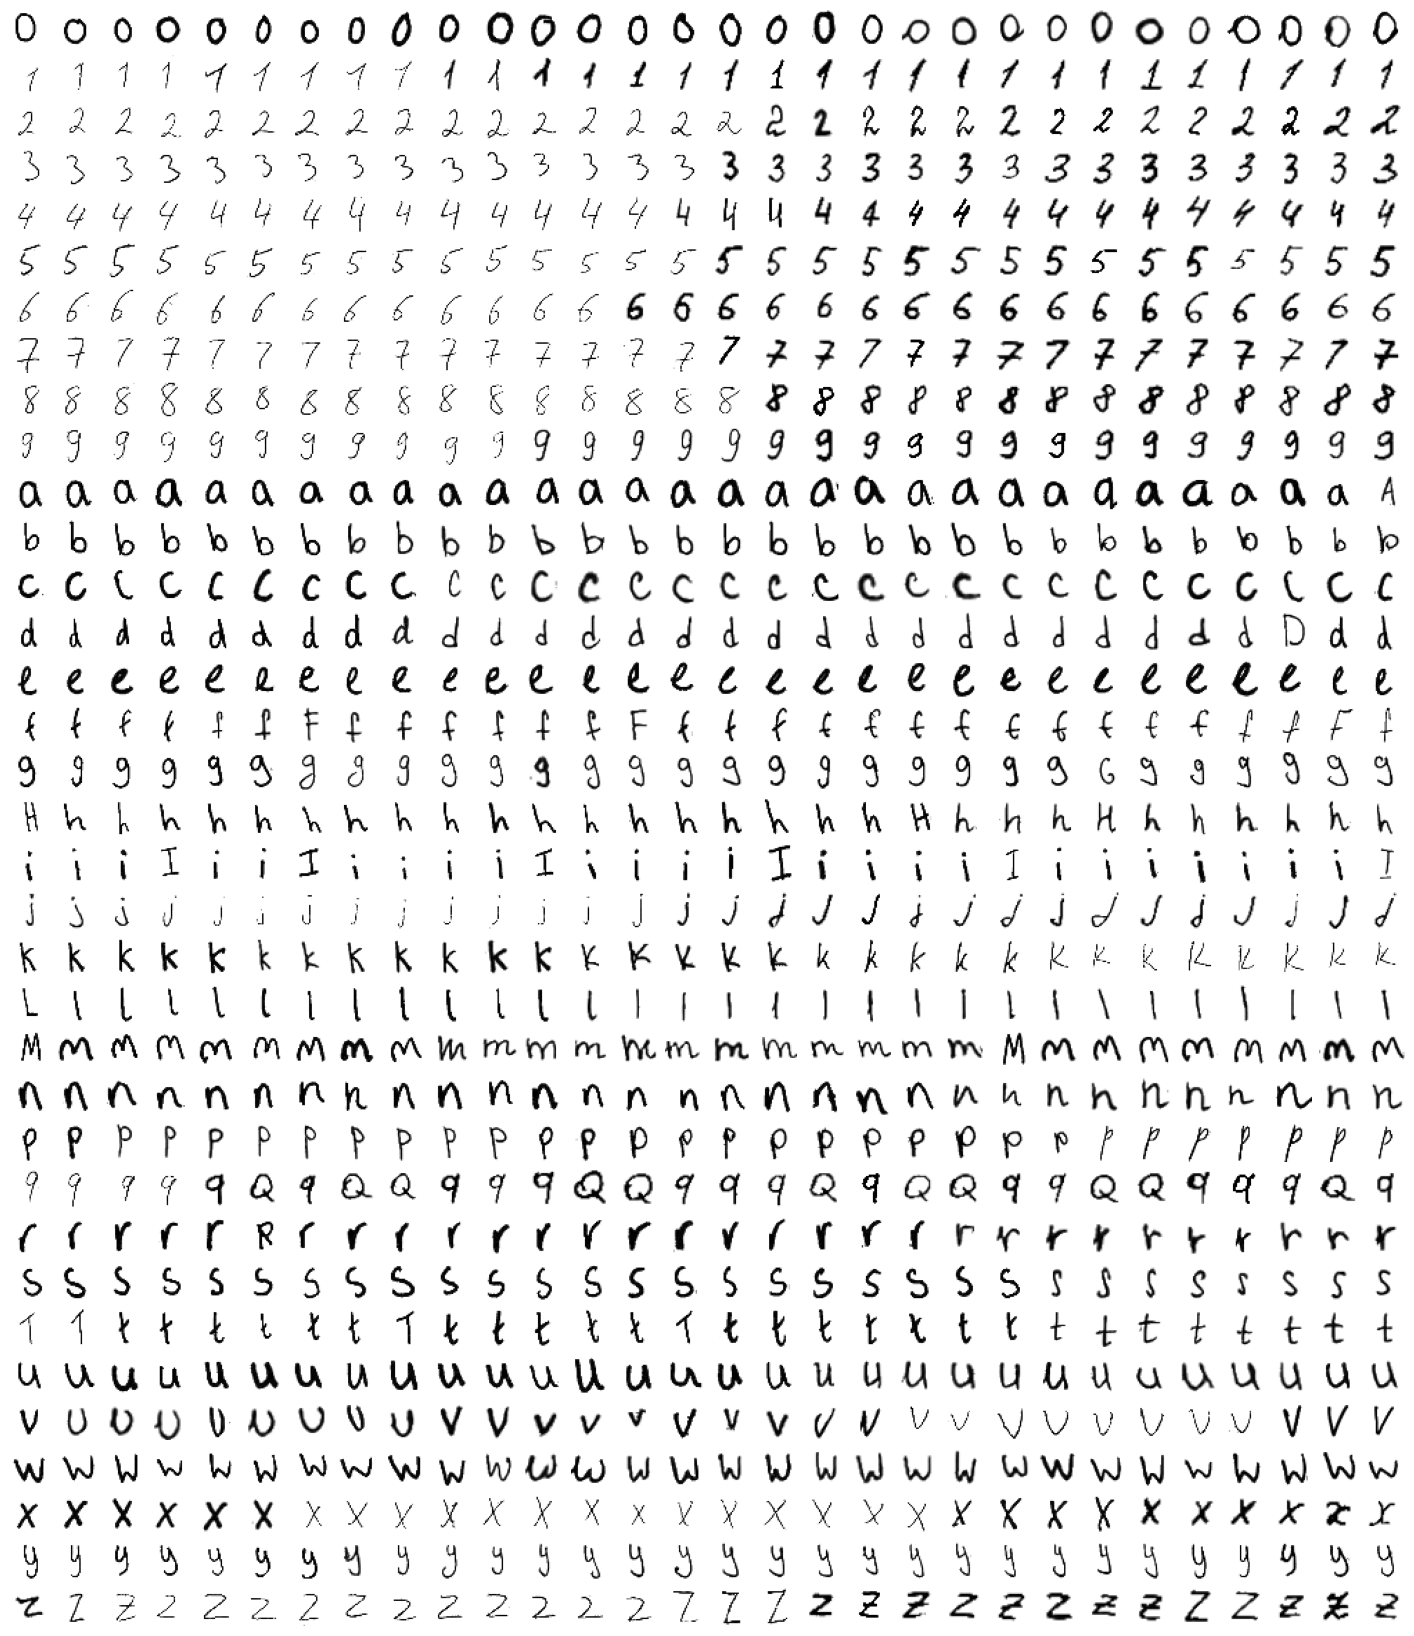

In [97]:
count = 0
plt.figure(figsize=(18, 21))
for classes in range(35):
  count = 0
  for i in range(len(test_data)):
      image, label = test_dataset['data'][i][0], test_dataset['targets'][i]
      if label == classes:
          plt.subplot(35, 30, classes*30+count+1)
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          count += 1
      if count == 35:
          break

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

ValueError: ignored

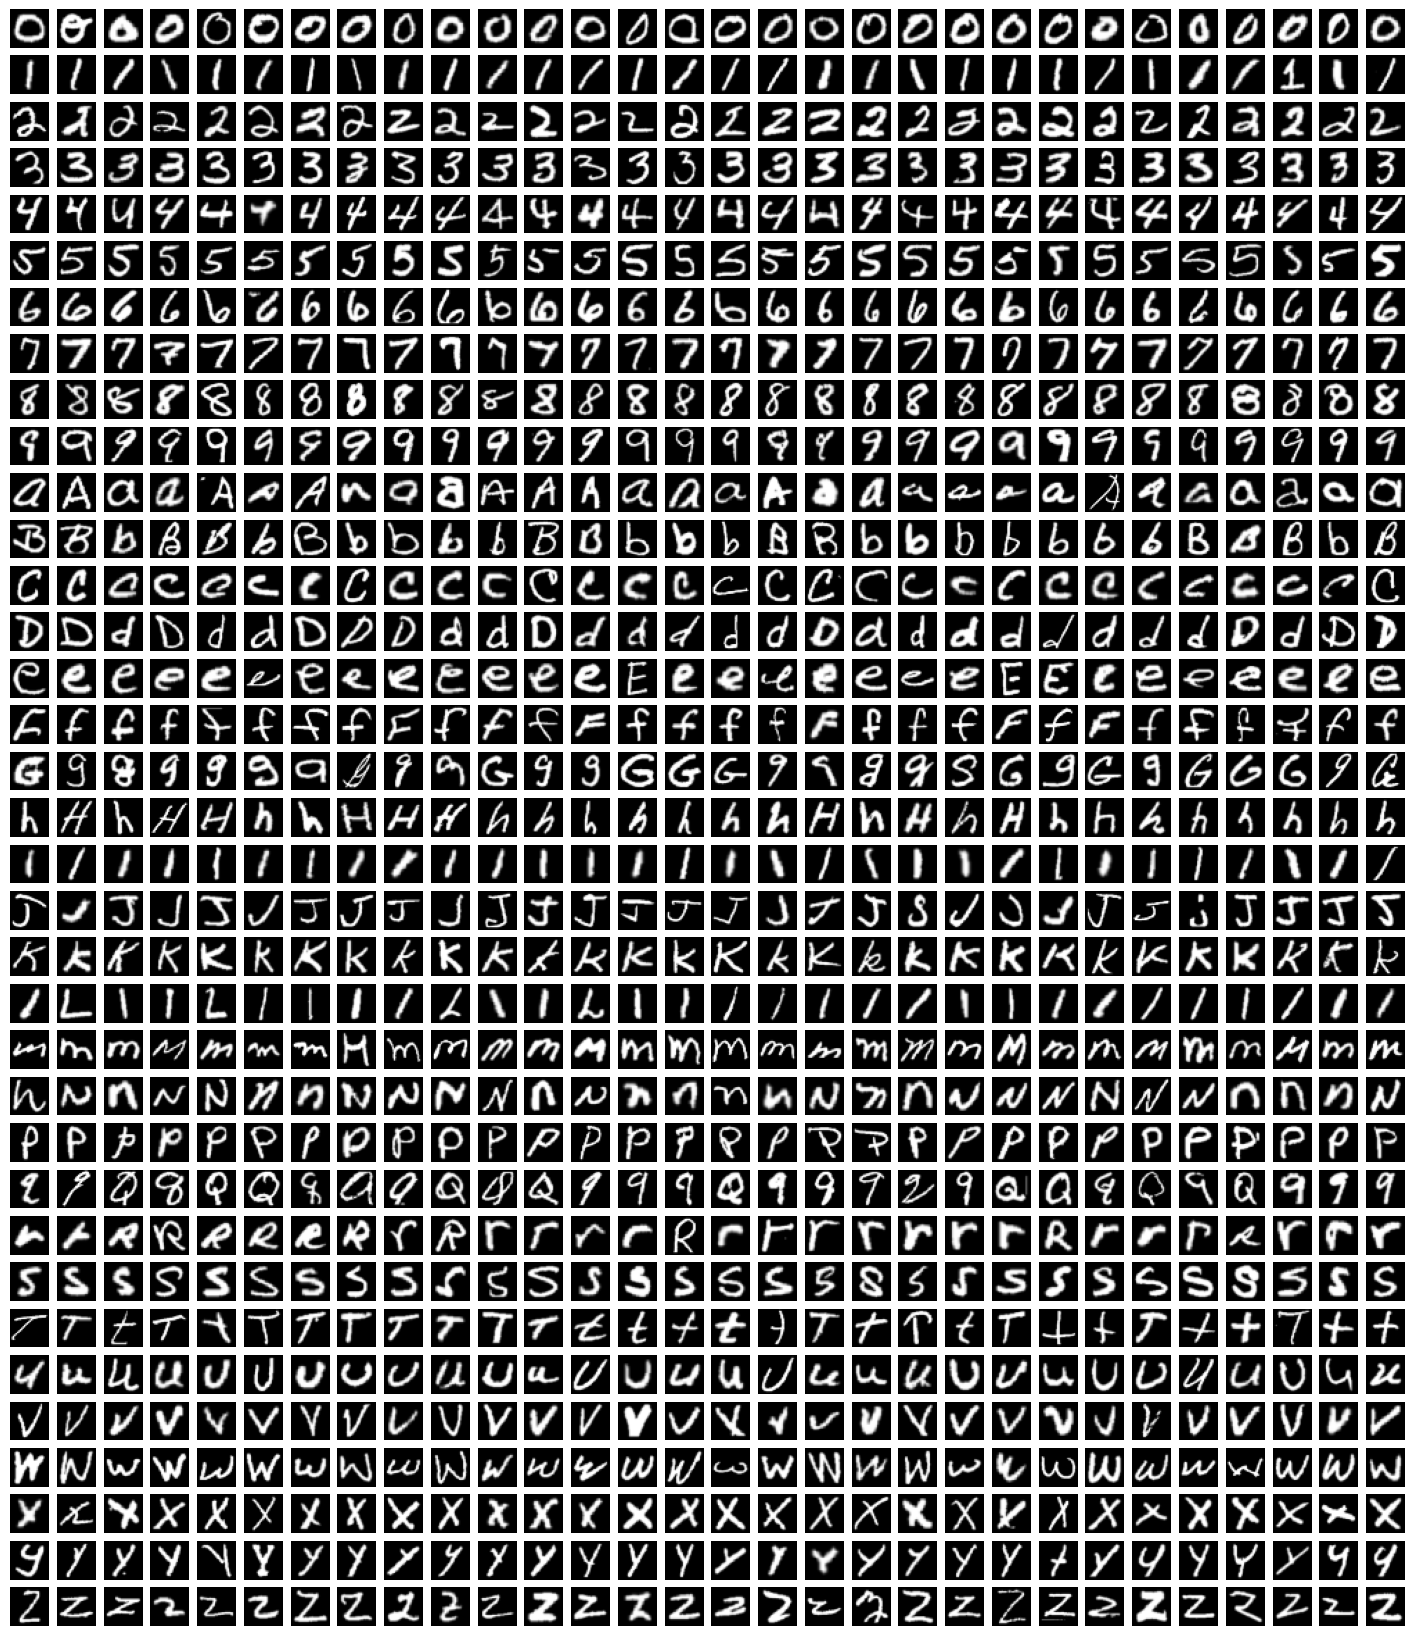

In [115]:
count = 0
plt.figure(figsize=(18, 21))
for classes in range(35):
  count = 0
  for i in range(len(train_data)):
      image, label = train_data[i][0].cpu(), train_labels[i].cpu()
      if label == classes:
          plt.subplot(35, 30, classes*30+count+1)
          plt.imshow(image.flip(dims=[1]).rot90(1, [0,1]), cmap='gray')
          plt.axis('off')
          count += 1
      if count == 35:
          break

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [112]:
tempp = train_labels.cpu()
for i in range(30000):
  if train_labels[i]==1:
    print(i)
    break

24961


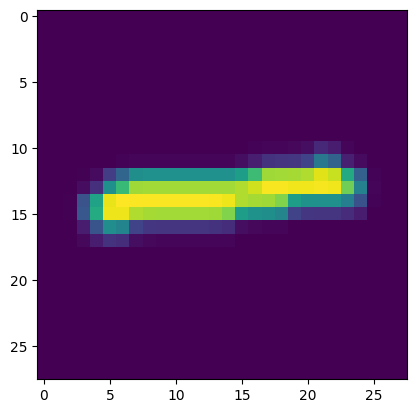

In [113]:
plt.imshow(train_data[24961][0].cpu())